In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# blue
color_0 = '#1f77b4'
color_0_light = '#8fbbd9'

# orange
color_1 = '#ff7f0e'
color_1_light = '#ffbf86'

colors = [color_0, color_1]
colors_light = [color_0_light,color_1_light]

# other constants
lower_percentile = 0.159
upper_percentile = 0.841

plt.rcParams.update({'font.size': 24,
                     'xtick.labelsize': 20,
                     'ytick.labelsize': 20,
                     'axes.titlesize': 28,
                     'axes.labelsize': 28,
                     'mathtext.fontset': 'stix',
                     'font.family': 'STIXGeneral'})

In [105]:
margin=-0.1
df = pd.read_csv(f'experiments/margin_{margin}_data.csv')
df = df[df['M'] == 50]
sep = 'separable' if margin > 0 else 'overlap'
shots = [4,8,16,32,64,128,256,512,1024,2048,4096] 

In [87]:
df['C']

19975    10.0
19976    10.0
19977    10.0
19978    10.0
19979    10.0
         ... 
20080    10.0
20081    10.0
20082    10.0
20083    10.0
20084    10.0
Name: C, Length: 110, dtype: float64

110
[[0.48206921 0.37120895 0.5511193  0.45225541 0.24922152 0.458038
  0.24792677 0.21181493 0.20427946 0.13577177 0.13580876]
 [0.48678173 0.60321669 0.63303428 0.38454314 0.46743374 0.44103054
  0.3772217  0.29573905 0.14755564 0.23175438 0.11473181]]
[-3.22027692  5.26912703]
110
[[5.88928636 5.89693803 4.92767543 5.562761   3.85804193 5.16122582
  5.19131957 4.24915803 4.50322504 4.09377665 4.37956205]
 [6.6440117  4.71801923 5.16346785 5.64535084 4.29044217 5.5366637
  6.55852478 7.31111489 6.4566905  5.84213108 3.80713628]]
[-12.46326911  36.64327845]


/var/folders/4n/frd9t6cx0ybc9csrrpzfk9mw0000gn/T/ipykernel_5345/259430198.py:20: RuntimeWarning: divide by zero encountered in power
  plt.plot(efine,np.exp(p[1])*efine**(p[0]),linestyle='-.',label=r'$\lambda = 1/{{%s}},\quad R\propto\varepsilon^{{%.2f}}$'%(int(C),p[0]),color=colors_light[i])
/var/folders/4n/frd9t6cx0ybc9csrrpzfk9mw0000gn/T/ipykernel_5345/259430198.py:20: RuntimeWarning: divide by zero encountered in power
  plt.plot(efine,np.exp(p[1])*efine**(p[0]),linestyle='-.',label=r'$\lambda = 1/{{%s}},\quad R\propto\varepsilon^{{%.2f}}$'%(int(C),p[0]),color=colors_light[i])


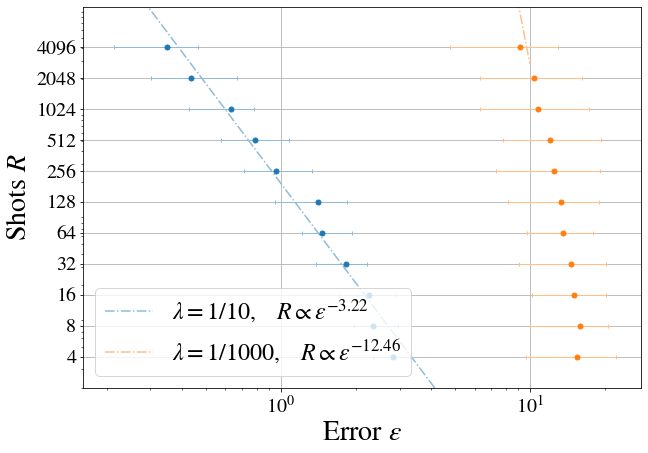

In [106]:
plt.figure(figsize=(10,7))
for i, C in enumerate([10.,1000.]):
    filter = df['C'] == C
    print(np.sum(filter))
    epsilons = np.array([df['epsilon'][(df['R'] == R) & filter ] for R in shots])
    means = np.mean(epsilons,axis=1)
    upper = np.quantile(epsilons, upper_percentile, axis=1)
    lower = np.quantile(epsilons,lower_percentile,axis=1)
    errors = np.array([means - lower, upper - means])
    print(errors)
    plt.errorbar(means,shots,xerr=errors,marker='.',ecolor=colors_light[i],elinewidth=1.,ls='',capsize=2,
        color=colors[i], ms=10)
    #plt.scatter(means,shots,c=colors[i])
    #plt.errorbar(means,shots,xerr=stds,fmt='.')
    plt.xscale('log')
    plt.yscale('log')
    p = np.polyfit(np.log(means),np.log(shots),1)
    print(p)
    efine = np.linspace(0,10)
    plt.plot(efine,np.exp(p[1])*efine**(p[0]),linestyle='-.',label=r'$\lambda = 1/{{%s}},\quad R\propto\varepsilon^{{%.2f}}$'%(int(C),p[0]),color=colors_light[i])

plt.yticks(shots,shots)
plt.ylim(2,1e4)
plt.xlabel(r'Error $\varepsilon$')
plt.ylabel(r'Shots $R$')
plt.grid()
plt.legend(loc='lower left')
plt.savefig(f'plots/dual_exponent_{sep}.png',dpi=300,bbox_inches='tight')